In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df['min_salary']

0       63
1       91
2      108
3       99
4       99
      ... 
675     85
676     94
677    124
678    109
679     87
Name: min_salary, Length: 680, dtype: int64

In [5]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,job_state,same_state,age,python,sql,excel,spark,aws,experience_2years
0,Data Engineer,$63k-$118k (Glassdoor Est.),Organization Description\nTides is a philanthr...,3.6,Tides\n3.6,"San Francisco, CA",-1,51 to 200 Employees,1976,Nonprofit Organization,...,Tides\n,CA,0,44,0,1,1,0,0,0
1,Data Engineer,$91k-$159k (Glassdoor Est.),Do you believe that creators should have the a...,3.2,Patreon\n3.2,"San Francisco, CA",-1,201 to 500 Employees,2013,Company - Private,...,Patreon\n,CA,0,7,1,1,0,1,1,0
2,Data Engineer,$108k-$192k (Glassdoor Est.),"Data Engineer\n\nThe data team designs, implem...",4.9,Asana\n4.9,"San Francisco, CA",-1,501 to 1000 Employees,2009,Company - Public,...,Asana\n,CA,0,11,1,1,0,1,1,0
3,Autonomous Driving Data Engineer,$99k-$178k (Glassdoor Est.),Leading the future of luxury mobility\n\nLucid...,3.9,Lucid Motors\n3.9,"Newark, CA",-1,1001 to 5000 Employees,2007,Company - Private,...,Lucid Motors\n,CA,0,13,1,0,1,1,1,0
4,Data Engineer,$99k-$178k (Glassdoor Est.),"Tribe and Karma of the Team:\n\n\nAt Segment, ...",4.2,Segment\n4.2,"San Francisco, CA",-1,201 to 500 Employees,2011,Company - Private,...,Segment\n,CA,0,9,1,1,0,0,1,0


In [6]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years'],
      dtype='object')

In [7]:
# Feature Engineering
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'Junior' in title.lower() or 'Graduate':
        return 'junior'
    else:
        return 'na'
    
# Job title and seniority

# Job Description Length

# Competitor Count

# Remove new line from job title
    

In [8]:
# Separates out different job types if there is any (Data Scientist, Analyst, Manager, NA)
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.job_simplified.value_counts()


data engineer    680
Name: job_simplified, dtype: int64

In [10]:
# Separates out different job types if there is any (Data Scientist, Analyst, Manager, NA)
df['seniority'] = df['Job Title'].apply(seniority)

# We can see the majority of the roles available in San Fran appear to be senior roles
# I added graduate to our seniority function which categorizes Graduate roles as Junior 
df.seniority.value_counts()

senior    504
junior    176
Name: seniority, dtype: int64

In [11]:
# Job Description Length in words (could be useful)
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       5122
1       3418
2       4350
3       3490
4       3677
       ...  
675     3625
676    11344
677     4715
678     3633
679     2169
Name: desc_len, Length: 680, dtype: int64

In [12]:
# Competitor Count (if there is any at all) **NOT IMPLEMENTED YET**
df['Competitors Count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)

In [13]:
# Hourly wage to annual  **NOT IMPLEMENTED YET**
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly == 1 else x.min_salary, axis = 1)

In [14]:
# Changing Pandas Options to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [15]:
df.company_txt

0                             Tides\n
1                           Patreon\n
2                             Asana\n
3                      Lucid Motors\n
4                           Segment\n
                    ...              
675                    EPAM Systems\n
676     California State University\n
677               NTT DATA Services\n
678                       U.S. Bank\n
679    Adventist Health System/West\n
Name: company_txt, Length: 680, dtype: object

In [16]:
# Removing the new line character from company_txt column '\n'
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [17]:
# Showing the updated company_txt column
df.company_txt

0                             Tides
1                           Patreon
2                             Asana
3                      Lucid Motors
4                           Segment
                   ...             
675                    EPAM Systems
676     California State University
677               NTT DATA Services
678                       U.S. Bank
679    Adventist Health System/West
Name: company_txt, Length: 680, dtype: object

In [18]:
df.describe()

,Rating,Headquarters,Founded,Competitors,Hourly,min_salary,max_salary,avg_salary,same_state,age,python,sql,excel,spark,aws,experience_2years,desc_len,Competitors Count
count,680.000000,680.0,680.000000,680.0,680.0,680.000000,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.0
mean,3.721618,-1.0,1810.335294,-1.0,0.0,103.864706,184.008824,143.936765,0.0,37.200000,0.783824,0.689706,0.414706,0.801471,0.533824,0.091176,4349.844118,0.0
std,0.485417,0.0,554.975526,0.0,0.0,20.713188,35.088568,27.775114,0.0,41.763673,0.411939,0.462954,0.493034,0.399186,0.499222,0.288072,2588.036116,0.0
min,2.500000,-1.0,-1.000000,-1.0,0.0,61.000000,117.000000,89.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,422.000000,0.0
25%,3.400000,-1.0,1962.000000,-1.0,0.0,87.000000,155.000000,121.000000,0.0,12.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2727.000000,0.0
50%,3.600000,-1.0,1993.000000,-1.0,0.0,97.000000,172.500000,134.250000,0.0,19.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3625.000000,0.0
75%,4.100000,-1.0,2006.000000,-1.0,0.0,122.000000,218.000000,170.000000,0.0,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4715.000000,0.0
max,5.000000,-1.0,2016.000000,-1.0,0.0,180.000000,325.000000,252.500000,0.0,170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11344.000000,0.0


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years', 'job_simplified', 'seniority', 'desc_len',
       'Competitors Count'],
      dtype='object')

<AxesSubplot:>

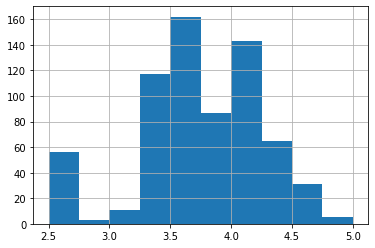

In [20]:
df.Rating.hist()


<AxesSubplot:>

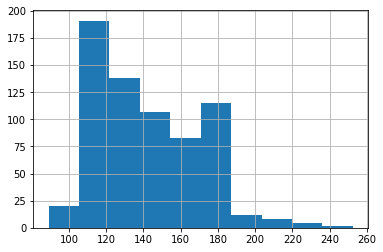

In [21]:
df.avg_salary.hist()

<AxesSubplot:>

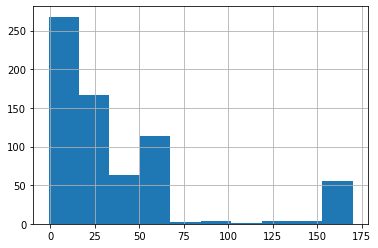

In [22]:
df.age.hist()

<AxesSubplot:>

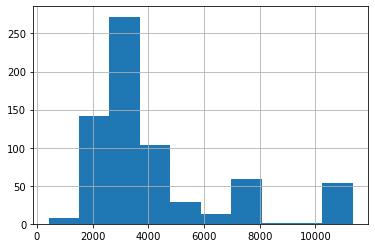

In [23]:
df.desc_len.hist()

<AxesSubplot:>

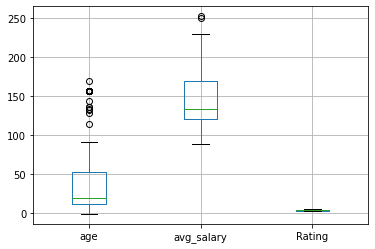

In [24]:
# We can see where the outliers are from this
df.boxplot(column = ['age', 'avg_salary','Rating'])

<AxesSubplot:>

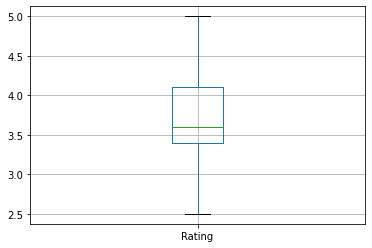

In [25]:
# Check to see what the rang of company ratings looks like
df.boxplot(column = 'Rating')

In [26]:
# Checking for correlation between variables
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()


,age,avg_salary,Rating,desc_len
age,1.000000,0.051290,0.016604,0.144403
avg_salary,0.051290,1.000000,0.080416,0.117551
Rating,0.016604,0.080416,1.000000,0.500453
desc_len,0.144403,0.117551,0.500453,1.000000


<AxesSubplot:>

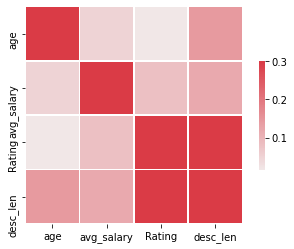

In [27]:
# Creating a correlation heatmap using seaborn library

# Controls the colour palette of the map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Creates map
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), cmap=cmap,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years', 'job_simplified', 'seniority', 'desc_len',
       'Competitors Count'],
      dtype='object')

In [29]:
# Creating a DataFrame of Categorical Data to be Analysed
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years', 'job_simplified', 'seniority']]

graph for Location: total = 25


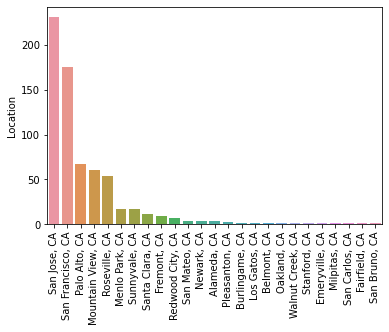

graph for Headquarters: total = 1


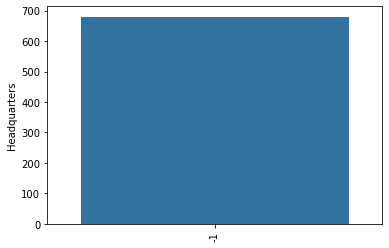

graph for Size: total = 7


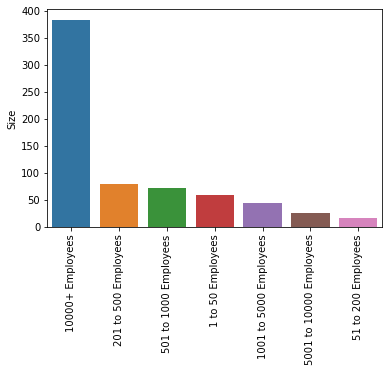

graph for Type of ownership: total = 6


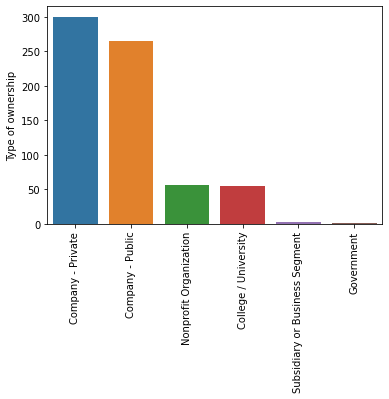

graph for Industry: total = 32


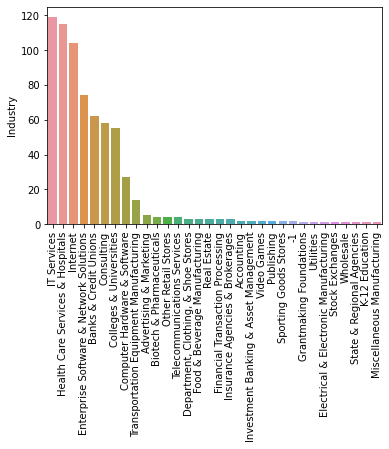

graph for Sector: total = 17


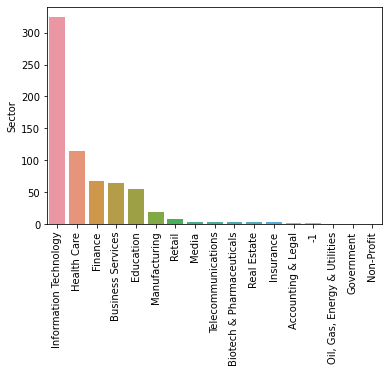

graph for Revenue: total = 12


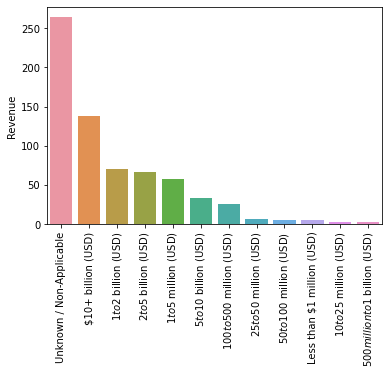

graph for company_txt: total = 134


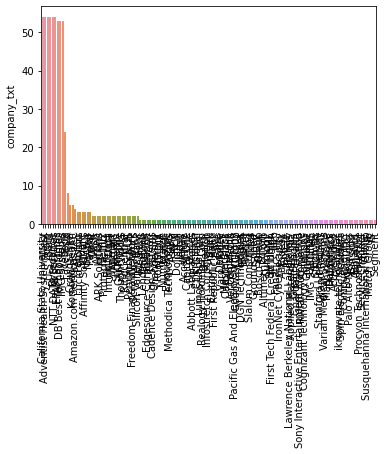

graph for job_state: total = 1


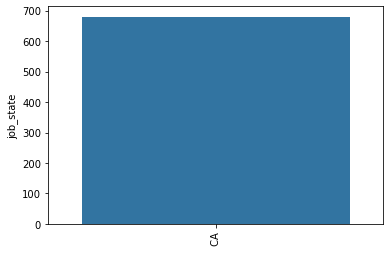

graph for same_state: total = 1


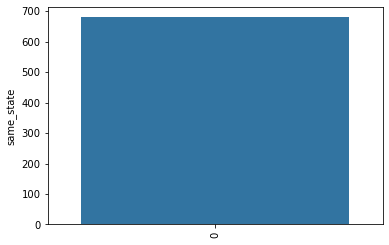

graph for python: total = 2


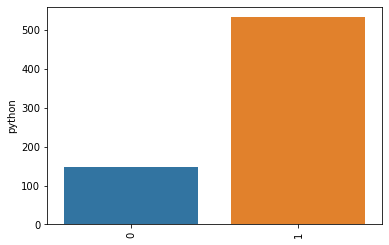

graph for sql: total = 2


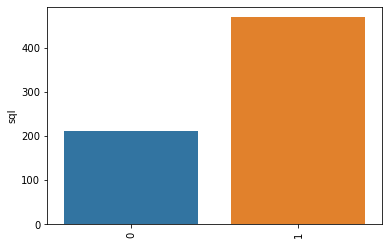

graph for excel: total = 2


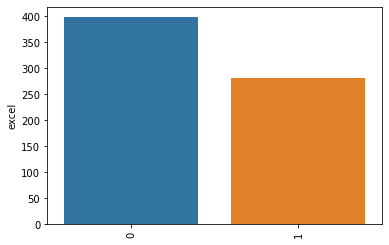

graph for spark: total = 2


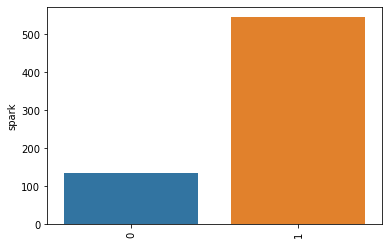

graph for aws: total = 2


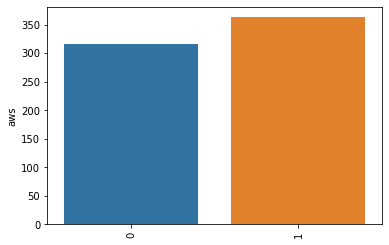

graph for experience_2years: total = 2


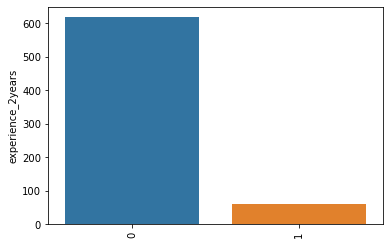

graph for job_simplified: total = 1


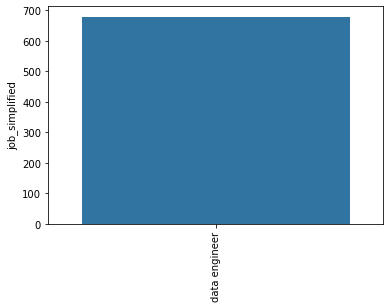

graph for seniority: total = 2


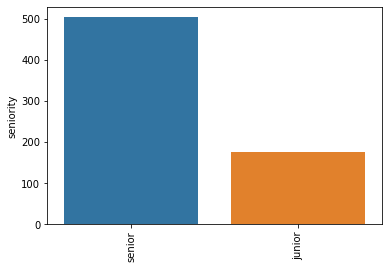

In [30]:
# Generating Bar plots for all categorical attributes in the Dataframe
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


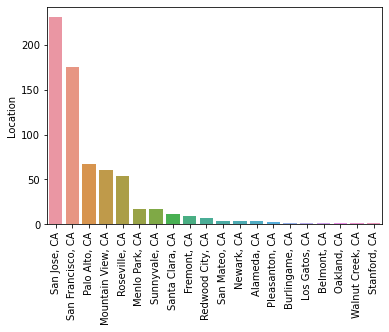

graph for Headquarters: total = 1


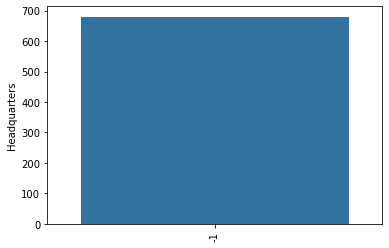

graph for company_txt: total = 20


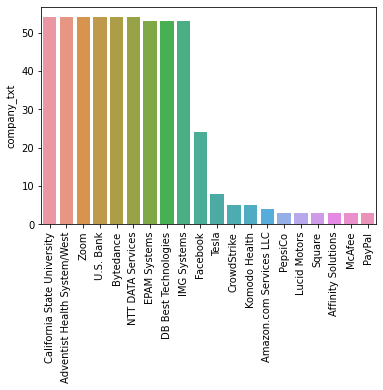

In [31]:
# Checking which city in California has most job opportunities and which location has the highest salaries
for i in df_cat[['Location', 'Headquarters', 'company_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years', 'job_simplified', 'seniority', 'desc_len',
       'Competitors Count'],
      dtype='object')

In [33]:
# From here I can actually see I should have added associate to my seniority function in data_cleaning.py script
# Comparing Salaries (this is like a group by function)
pd.pivot_table(df, index = 'Job Title', values ='avg_salary')

,avg_salary
Job Title,
AWS Data Engineer,148.5
Associate Data Engineer,97.5
Audio Data Engineer,122.5
Autonomous Driving Data Engineer,138.5
Avail - Staff Data Engineer,140.0
...,...
Staff/Lead Data Engineer,112.0
Workato Data Engineer / API Integration resource,112.0
eCom Data Engineer,97.0


In [34]:
# Since our data only contains data engineer positions there are no other positions to compare salaries with

pd.pivot_table(df, index = 'job_simplified', values ='avg_salary')

,avg_salary
job_simplified,
data engineer,143.936765


In [35]:
# Grouped by role and seniority - wen see what the average salary is depending on seniority
pd.pivot_table(df, index = ['job_simplified', 'seniority'], values ='avg_salary')

avg_salary
job_simplified seniority            
data engineer  junior     126.946023
               senior     149.870040

In [36]:
# Check the average salary for each city in the state sorted highest to lowest
pd.pivot_table(df, index = "Location", values ='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
"Los Gatos, CA",221.000000
"San Mateo, CA",172.750000
"Emeryville, CA",170.000000
"Palo Alto, CA",163.820896
"San Bruno, CA",160.000000
"Menlo Park, CA",159.617647
"San Francisco, CA",156.105114
"Sunnyvale, CA",154.235294
"Oakland, CA",154.000000


In [37]:
# Checking if jobs that require python pay higher or lower salaries
pd.pivot_table(df, index = ["python"], values ='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
python,
0,145.751701
1,143.436210


In [38]:
# Checking if jobs that require python & sql pay higher or lower salaries
# This show that SQL is a skill that commands higher paying jobs than python (Who knew?)
pd.pivot_table(df, index = ["python", "sql"], values ='avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
python sql            
0      1    165.367089
1      1    150.487179
       0    124.206294
0      0    122.963235

In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python', 'sql', 'excel', 'spark',
       'aws', 'experience_2years', 'job_simplified', 'seniority', 'desc_len',
       'Competitors Count'],
      dtype='object')

In [40]:
# Rating, industry, sector , revenue, Competitors Count, hourly, employer_provided, python, sql, excel, spark, aws, desc_len, type of ownership

In [41]:
# Creating a dataframe for out pivots  
#(I forgot to change the skills to yes/no rather than 0 or 1, for clarity)  
df_pivots = df[['Rating', 'Industry', 'Sector', 'Competitors Count', 'Hourly', 'python', 'sql', 'excel', 'spark', 'aws','Type of ownership', 'avg_salary']]

In [42]:
# We see real estate is 3 rd in terms of sectors
# We can see the Oil and Gas sector pays the most which is expected
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
3.3     183.815789
3.4     172.675000
3.0     170.000000
4.7     169.750000
4.1     168.708333
5.0     168.000000
4.3     166.024194
4.8     161.500000
4.5     157.240000
3.6     148.929577
3.8     141.583333
3.1     137.000000
4.9     137.000000
4.4     136.166667
4.2     135.140625
3.7     134.625000
3.9     126.800000
3.5     125.319277
4.0     124.470149
2.8     122.000000
2.7     120.537037
4.6     120.000000
3.2     114.142857
2.5     113.000000
2.9     105.250000
Industry
                                         avg_salary
Industry                                           
Sporting Goods Stores                    213.500000
Utilities                                204.000000
Real Estate                              174.666667
Wholesale                                170.000000
Other Retail Stores                      168.625000
Enterprise Software & Network Solutions  167.290541
Department, Clothing, & Shoe Stores      162.166667
Tel

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
# Checking weather companies who have python developer make more revenue than those that don't
pd.pivot_table(df_pivots, index = df['Revenue'], columns = 'python', values ='avg_salary' )

In [ ]:
# Checking what companies are hiring the most python deveopers (need to create ratio for this)
pd.pivot_table(df_pivots, index = df['Revenue'], columns = 'python', values ='avg_salary', aggfunc = 'count')

In [60]:
# Creating a word cloud to see common words that come up in Data Engineer job description
#from wordcloud import WorldCloud, ImageColorGenerator, STOPWORDS

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RussellP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

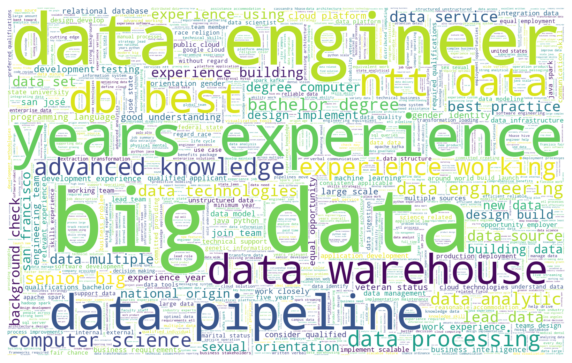

In [62]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 1600, height = 1000)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()